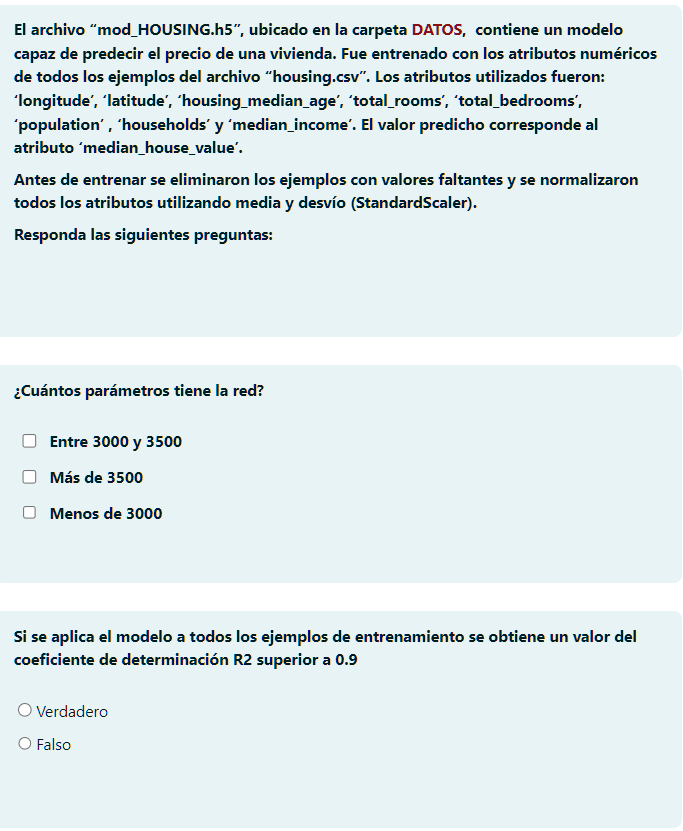
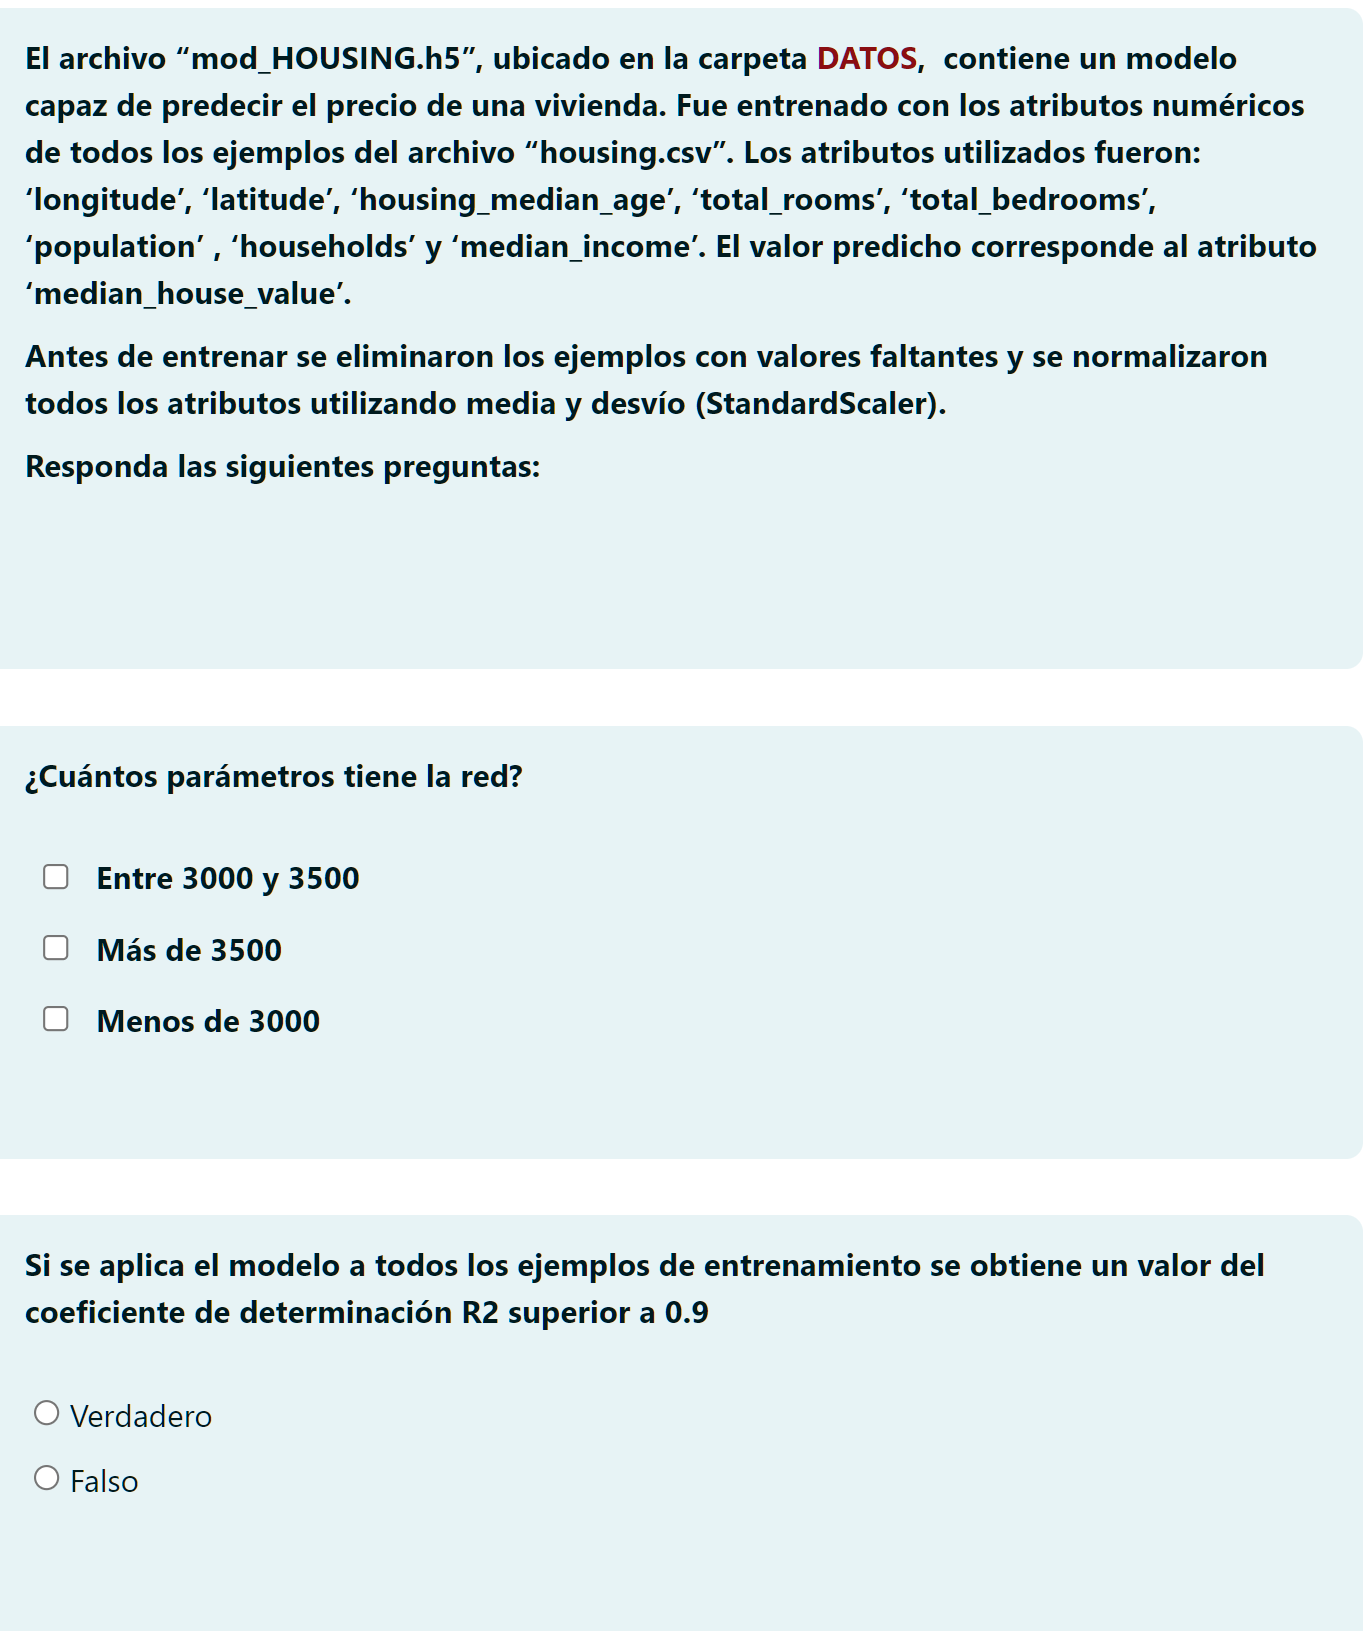

In [89]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [90]:
from tensorflow.keras.models import load_model

# Cargar el modelo
model = load_model(DATOS_DIR + 'mod_HOUSING.h5')

# Mostrar resumen del modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [91]:
import chardet
import pandas as pd
nombre_archivo = DATOS_DIR + 'housing.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [92]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [93]:
# muestra cantidad de valores faltantes o nulos por atributo/característica
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [94]:
# Eliminar filas con valores faltantes
df = df.dropna()

In [95]:
# muestra cantidad de valores faltantes o nulos por atributo/característica
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [96]:
# Eliminar una columna específica utilizando el nombre de la columna
df = df.drop('ocean_proximity', axis=1)

In [97]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [98]:
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [99]:
X = np.array(df.iloc[:,:-1]) #Selecciono todas menos la ultima
T = np.array(df.iloc[:,-1]).reshape(-1, 1) #Selecciona la ultima

In [100]:
data_scaler = StandardScaler()
target_scaler = StandardScaler()
X = data_scaler.fit_transform(X)
T = target_scaler.fit_transform(T)

X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)#, random_state=42)

In [101]:
# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = model.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)

511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


In [102]:
# Desescalado de predicciones
y_pred_train = target_scaler.inverse_transform(y_pred_train)
y_pred_test = target_scaler.inverse_transform(y_pred_test)

# Desescalado de valores reales
T_train = target_scaler.inverse_transform(T_train)
T_test = target_scaler.inverse_transform(T_test)

# Calcular R² en entrenamiento
r2_train = r2_score(T_train, y_pred_train)
print(f"Coeficiente de determinación R² en Entrenamiento: {r2_train:.4f}")

Coeficiente de determinación R² en Entrenamiento: 0.7909
